In [1]:
import pandas as pd

In [2]:
df = pd.read_html("https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html")
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [3]:
mars_temp = df[0]

In [4]:
mars_temp

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
mars_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [6]:
mars_temp["terrestrial_date"]= pd.to_datetime(mars_temp['terrestrial_date'])

In [7]:
mars_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [8]:
# How many months exist on Mars?

mars_temp['month'].unique()

# There are 12 months on Mars.


array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [9]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
1867

1867

In [10]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

mars_coldest = mars_temp.groupby(['month']).min()["min_temp"]
mars_cold = pd.DataFrame(mars_coldest)
mars_cold

,min_temp
month,
1,-82.0
2,-86.0
3,-90.0
4,-89.0
5,-85.0
6,-84.0
7,-78.0
8,-75.0
9,-78.0


In [11]:
mars_cold.reset_index(inplace = True)

In [12]:
mars_cold.columns

Index(['month', 'min_temp'], dtype='object')

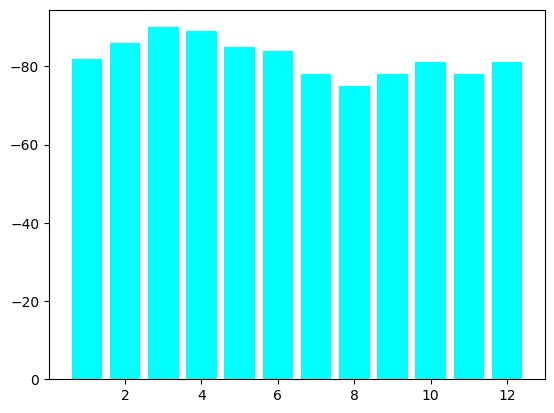

In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
x = mars_cold["month"]
y = mars_cold["min_temp"]
plt.bar(x,y,color = 'cyan')
plt.gca().invert_yaxis()

In [14]:
mars_temp["min_temp"].min()

-90.0

In [15]:
# The coldest month on Mars in 3rd month.

In [17]:
mars_warmest = mars_temp.groupby(['month']).max()["min_temp"]
mars_warm = pd.DataFrame(mars_warmest)
mars_warm

,min_temp
month,
1,-62.0
2,-76.0
3,-77.0
4,-77.0
5,-74.0
6,-71.0
7,-65.0
8,-63.0
9,-63.0


In [18]:
mars_warm.reset_index(inplace = True)

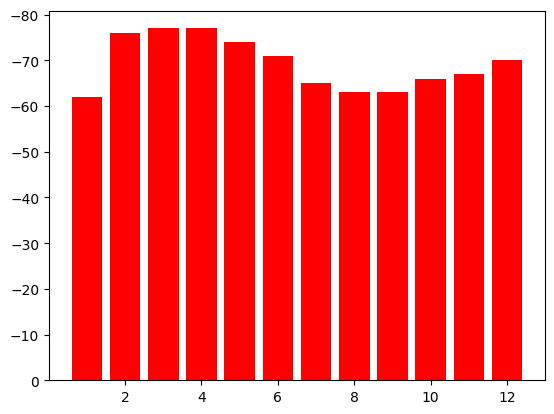

In [20]:
x = mars_warm["month"]
y = mars_warm["min_temp"]
plt.bar(x,y,color = 'red')
plt.gca().invert_yaxis()

In [21]:
# The warmest month on Mars is 1st month.

In [25]:
#Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
mars_high = mars_temp.groupby(['month']).max()["pressure"]
mars_high_pressure = pd.DataFrame(mars_high)
mars_high_pressure
mars_high_pressure.reset_index(inplace = True)

In [28]:
mars_high_pressure

,month,pressure
0,1,888.0
1,2,908.0
2,3,907.0
3,4,857.0
4,5,777.0
5,6,764.0
6,7,836.0
7,8,914.0
8,9,925.0
9,10,917.0


<BarContainer object of 12 artists>

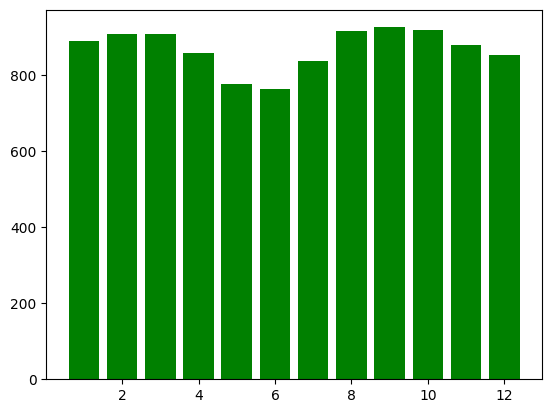

In [27]:
x = mars_high_pressure["month"]
y = mars_high_pressure["pressure"]
plt.bar(x,y,color = 'green')

In [29]:
# 9th month has the highest atmospheric pressure

In [32]:
mars_low = mars_temp.groupby(['month']).min()["pressure"]
mars_low_pressure = pd.DataFrame(mars_low)
mars_low_pressure
mars_low_pressure.reset_index(inplace = True)

In [33]:
mars_low_pressure

,month,pressure
0,1,820.0
1,2,867.0
2,3,833.0
3,4,754.0
4,5,727.0
5,6,732.0
6,7,751.0
7,8,828.0
8,9,896.0
9,10,862.0


<BarContainer object of 12 artists>

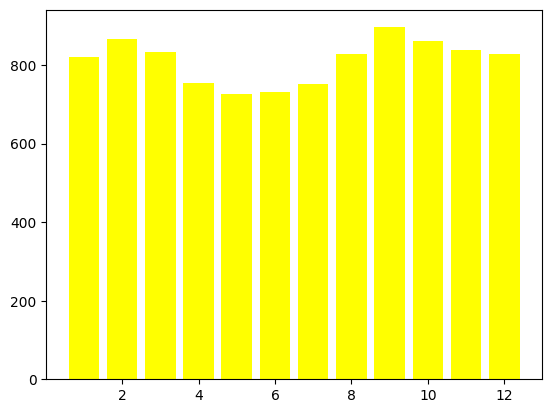

In [34]:
x = mars_low_pressure["month"]
y = mars_low_pressure["pressure"]
plt.bar(x,y,color = 'yellow')

In [35]:
# 5th month has the lowest atmospheric pressure

In [37]:
mars_temp.to_csv("C:/Users/avnit/Desktop/Mission -to-Mars.csv",encoding='utf8', index= False)